In [1]:
# import required library
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# read data
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
# head of data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# check missing value
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
len(df)

299

In [6]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# description of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [8]:
# declare features and target
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

In [9]:
# lihat jumlah data
print(f'Count of X: {X.shape}\ncount of y: {y.shape}')

Count of X: (299, 12)
count of y: (299,)


In [10]:
c0 = df[df.DEATH_EVENT==0]
c1 = df[df.DEATH_EVENT==1]
print(f'count of data with label 0: {len(c0)}\ncount of data with label 1: {len(c1)}')

count of data with label 0: 203
count of data with label 1: 96


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

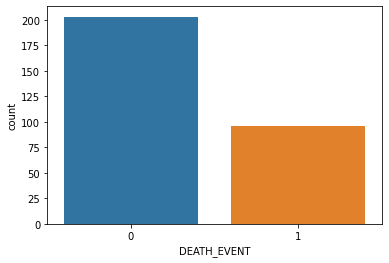

In [11]:
# see proportion of labels
sns.countplot(x='DEATH_EVENT', data=df)

# 203 selamat
# 96 meninggal

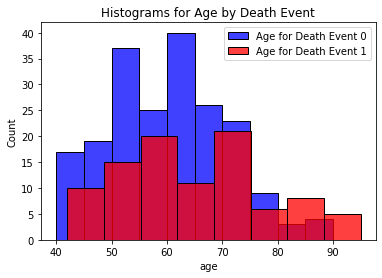

In [12]:
# plot comparison age by death event
sns.histplot(c0.age,kde=False,color="blue", label="Age for Death Event 0")
sns.histplot(c1.age,kde=False,color = "red", label = "Age for Death Event 1")
plt.title("Histograms for Age by Death Event")
plt.legend()

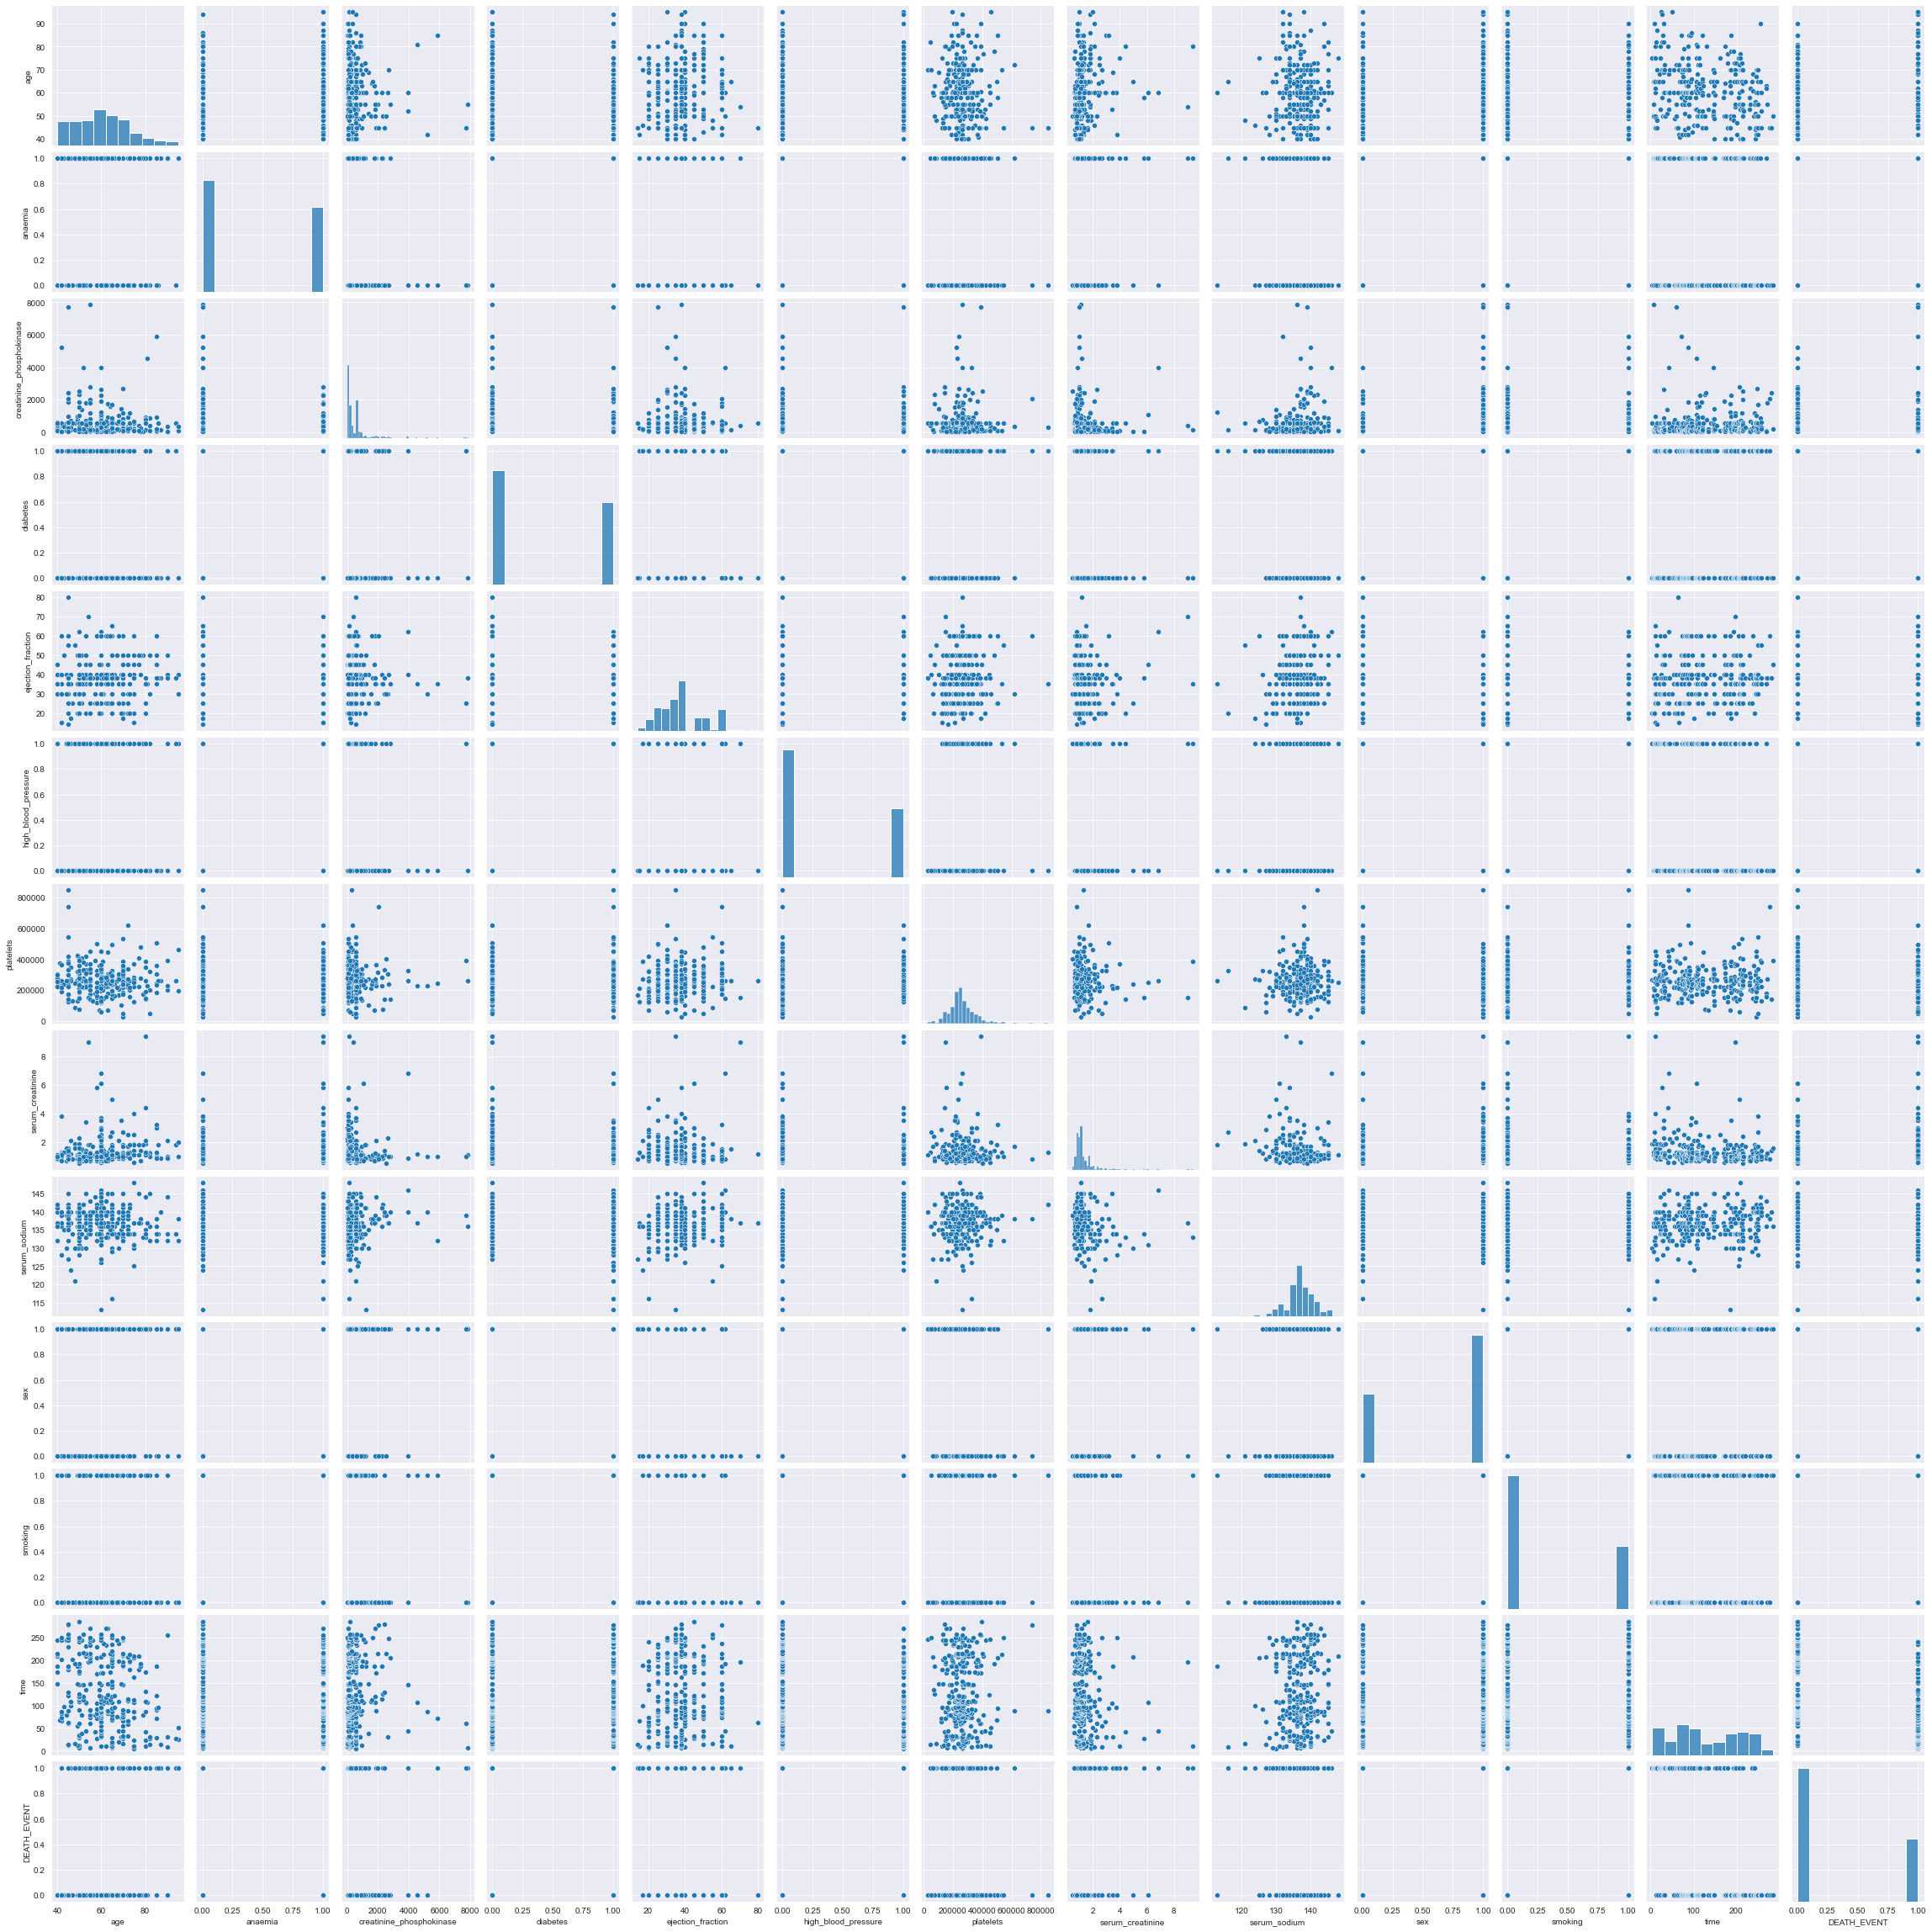

In [13]:
# visualize to see distribution of the data
sns.set_style(style='darkgrid')
sns.pairplot(df)

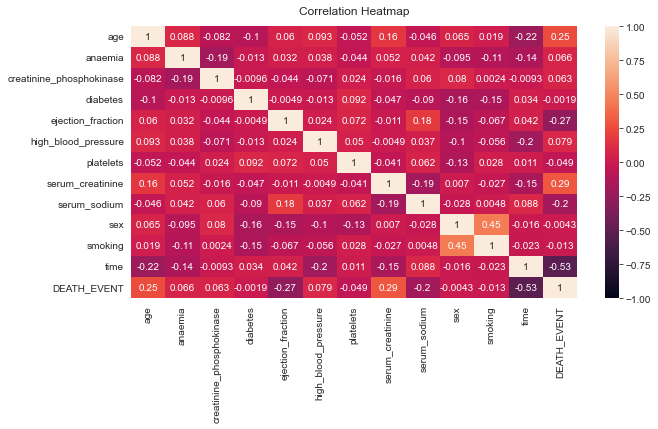

In [14]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [15]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=11)

# **Test Non Pruning Decision Tree**

In [16]:
# declare model dtc
dtc = DecisionTreeClassifier(random_state=11, 
                             criterion='entropy')

In [17]:
# fitting the train data into model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=11)

In [18]:
# do a prediction using test data
npr_pred=dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, npr_pred)
acc_dtc

0.6933333333333334

In [19]:
# make a classification report
print(classification_report(y_test, npr_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.56      0.58      0.57        26

    accuracy                           0.69        75
   macro avg       0.66      0.67      0.66        75
weighted avg       0.70      0.69      0.69        75



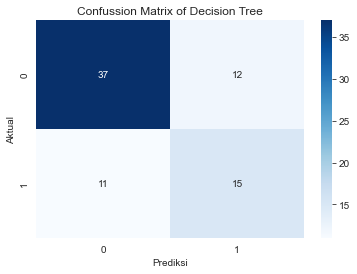

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, npr_pred)

ax = sns.heatmap(cm, annot=True, cmap="Blues")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of Decision Tree')
plt.show()

[Text(0.4296875, 0.9444444444444444, 'x[11] <= 73.5\nentropy = 0.896\nsamples = 224\nvalue = [154, 70]'),
 Text(0.15625, 0.8333333333333334, 'x[8] <= 136.5\nentropy = 0.706\nsamples = 52\nvalue = [10, 42]'),
 Text(0.0625, 0.7222222222222222, 'x[4] <= 47.5\nentropy = 0.345\nsamples = 31\nvalue = [2, 29]'),
 Text(0.03125, 0.6111111111111112, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.09375, 0.6111111111111112, 'x[7] <= 1.05\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.0625, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.125, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.25, 0.7222222222222222, 'x[8] <= 139.5\nentropy = 0.959\nsamples = 21\nvalue = [8, 13]'),
 Text(0.21875, 0.6111111111111112, 'x[0] <= 59.0\nentropy = 0.985\nsamples = 14\nvalue = [8, 6]'),
 Text(0.1875, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.5, 'x[7] <= 1.25\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.1875, 0.3888888888888889, 'x

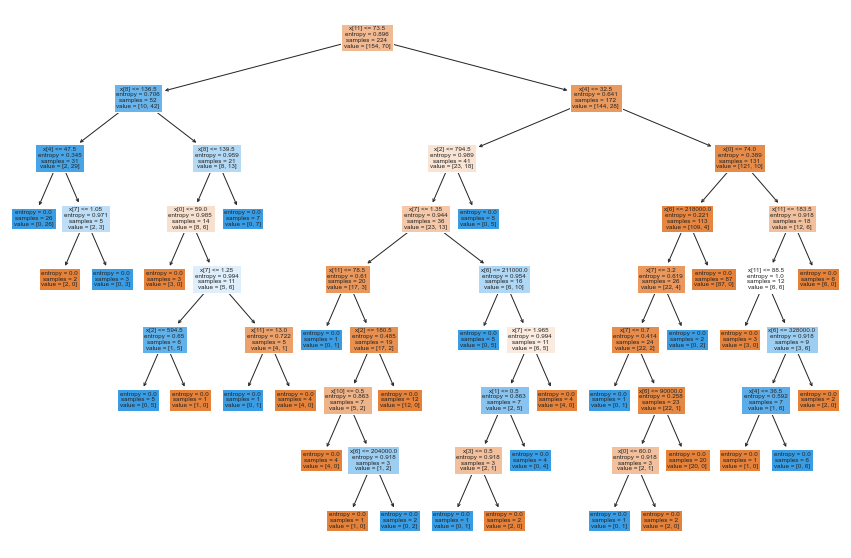

In [21]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

# **Test Pruning Decision Tree**

In [22]:
clf = DecisionTreeClassifier(random_state=11, 
                             criterion='entropy')

In [23]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [24]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=11,
                             ccp_alpha=ccp_alpha, )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.23992817708272618


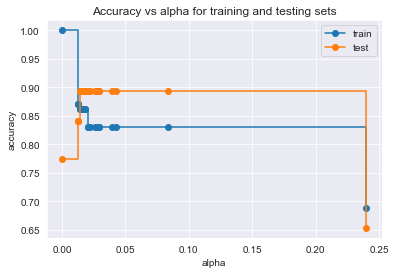

In [25]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [26]:
# in alpha -+0.3 accuracy model has incrased, use alpha 0.3 to pruning parameter (ccp_alpha)
# when more the alpha increases, the more the decision tree is cut
clf = DecisionTreeClassifier(random_state=11,
                             ccp_alpha=0.03, 
                             criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy', random_state=11)

In [27]:
# do a prediction and check accuracy score
pr_pred=clf.predict(X_test)
acc_prdtc = accuracy_score(y_test, pr_pred)
acc_prdtc

0.8933333333333333

In [28]:
# print classification report
print(classification_report(y_test, pr_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        49
           1       0.88      0.81      0.84        26

    accuracy                           0.89        75
   macro avg       0.89      0.87      0.88        75
weighted avg       0.89      0.89      0.89        75



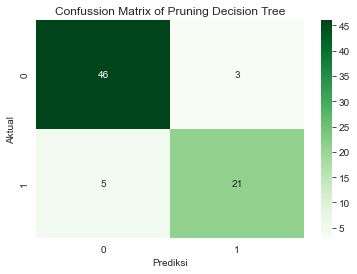

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, pr_pred)

ax = sns.heatmap(cm, annot=True, cmap="Greens")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of Pruning Decision Tree')
plt.show()

[Text(0.3333333333333333, 0.9, 'x[11] <= 73.5\nentropy = 0.896\nsamples = 224\nvalue = [154, 70]'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.706\nsamples = 52\nvalue = [10, 42]'),
 Text(0.5, 0.7, 'x[4] <= 32.5\nentropy = 0.641\nsamples = 172\nvalue = [144, 28]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.989\nsamples = 41\nvalue = [23, 18]'),
 Text(0.6666666666666666, 0.5, 'x[0] <= 74.0\nentropy = 0.389\nsamples = 131\nvalue = [121, 10]'),
 Text(0.5, 0.3, 'x[6] <= 218000.0\nentropy = 0.221\nsamples = 113\nvalue = [109, 4]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.619\nsamples = 26\nvalue = [22, 4]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.8333333333333334, 0.3, 'entropy = 0.918\nsamples = 18\nvalue = [12, 6]')]

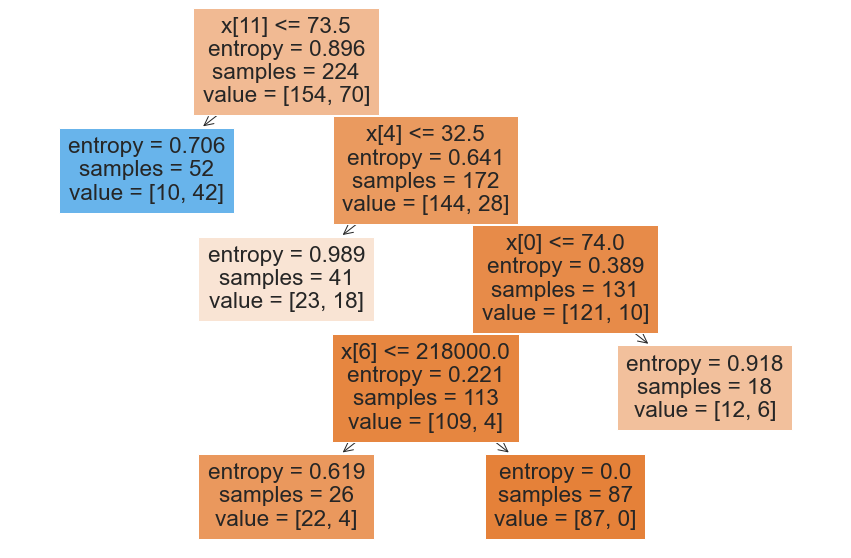

In [30]:
# visualize the pruned tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

# **Test Bagging Classifier**

In [31]:
# declare model bagging classifier with best parameter from hyperparameter tuning
bcl = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',random_state=11), 
                        n_estimators=50, max_samples=0.5, random_state=11, n_jobs=-1)

In [32]:
# fitting the model
bcl.fit(X_train, y_train)

c:\Users\LABDATAPC19\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        random_state=11),
                  max_samples=0.5, n_estimators=50, n_jobs=-1, random_state=11)

In [33]:
# do prediction with data test
bcl_pred = bcl.predict(X_test)

In [34]:
# write accuracy score
acc_bcl= accuracy_score(y_test, bcl_pred)
acc_bcl

0.8933333333333333

In [35]:
# make classification report
print(classification_report(y_test, bcl_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        49
           1       0.88      0.81      0.84        26

    accuracy                           0.89        75
   macro avg       0.89      0.87      0.88        75
weighted avg       0.89      0.89      0.89        75



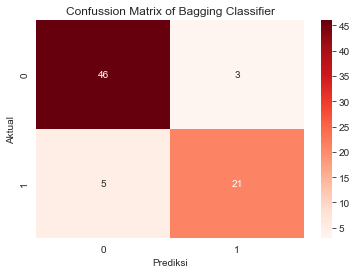

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, pr_pred)

ax = sns.heatmap(cm, annot=True, cmap="Reds")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of Bagging Classifier')
plt.show()

# **Test Random Forest**

In [37]:
# declare model random forest with best parameter from hyperparameter tuning
rf = RandomForestClassifier(n_estimators=100,
                            criterion='entropy',
                            max_features=0.5,
                            min_samples_leaf=10,
                            random_state=11,
                            n_jobs=1)


In [38]:
# fit data train into model
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=0.5,
                       min_samples_leaf=10, n_jobs=1, random_state=11)

In [39]:
# do prediction
rf_pred = rf.predict(X_test)

In [40]:
# print accuracy score
acc_rf = accuracy_score(y_test, rf_pred)
acc_rf

0.8933333333333333

In [41]:
# print classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.85      0.85      0.85        26

    accuracy                           0.89        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.89      0.89      0.89        75



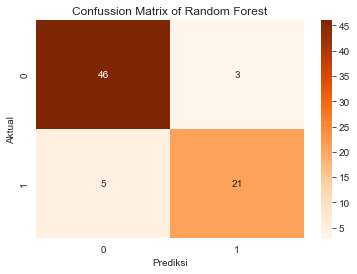

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, pr_pred)

ax = sns.heatmap(cm, annot=True, cmap="Oranges")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of Random Forest')
plt.show()

# **Test with Oversampling using SMOTE**

In [43]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

[Text(0.5, 1.0, 'Proportion of y after oversampligs')]

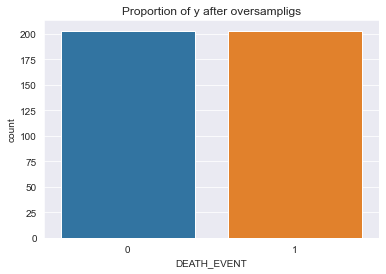

In [44]:
sns.countplot(x=y_res).set(title='Proportion of y after oversampligs')

In [45]:
# split the data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, 
                                                    y_res, 
                                                    test_size=0.25, 
                                                    random_state=11)

In [46]:
# lihat jumlah data
print(f'Count of X: {X.shape}\ncount of y: {y.shape}')

Count of X: (299, 12)
count of y: (299,)


In [47]:
# lihat jumlah data
print(f'Count of X: {X_res.shape}\ncount of y: {y_res.shape}')

Count of X: (406, 12)
count of y: (406,)


In [48]:
# do a prediction and check accuracy score
pr_pred_res=dtc.predict(X_test_res)
acc_dtcovs = accuracy_score(y_test_res, pr_pred_res)
acc_dtcovs

0.8529411764705882

In [49]:
print(classification_report(y_test_res, pr_pred_res))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        51
           1       0.88      0.82      0.85        51

    accuracy                           0.85       102
   macro avg       0.85      0.85      0.85       102
weighted avg       0.85      0.85      0.85       102



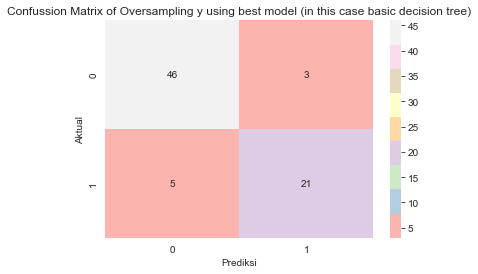

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, pr_pred)

ax = sns.heatmap(cm, annot=True, cmap="Pastel1")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of Oversampling y using best model (in this case basic decision tree)')
plt.show()

# *Test with Other Algorithm*

In [51]:
def model(classifier):
    classifier.fit(X_train,y_train)
    ml_pred = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print(classification_report(y_test, ml_pred))

# **Logistic Regresssion**

In [52]:
lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

In [53]:
model(lr)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        49
           1       0.78      0.69      0.73        26

    accuracy                           0.83        75
   macro avg       0.81      0.80      0.80        75
weighted avg       0.82      0.83      0.82        75



In [54]:
# print accuracy score
acc_lr = accuracy_score(y_test, rf_pred)
acc_lr

0.8933333333333333

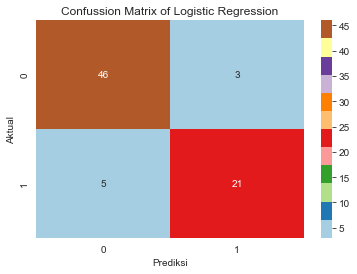

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, pr_pred)

ax = sns.heatmap(cm, annot=True, cmap="Paired")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of Logistic Regression')
plt.show()

# **Support Vector Machine**

In [56]:
SVM = SVC(kernel = 'linear',C = 0.3)

In [57]:
model(SVM)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        49
           1       0.65      0.65      0.65        26

    accuracy                           0.76        75
   macro avg       0.74      0.74      0.74        75
weighted avg       0.76      0.76      0.76        75



In [58]:
# print accuracy score
acc_svm = accuracy_score(y_test, rf_pred)
acc_svm

0.8933333333333333

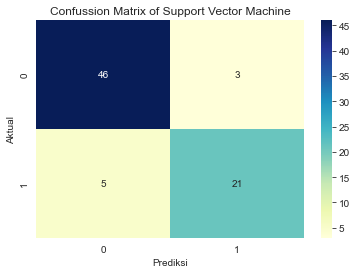

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, pr_pred)

ax = sns.heatmap(cm, annot=True, cmap="YlGnBu")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of Support Vector Machine')
plt.show()

# **K-Nearest Neighbor**

In [60]:
KNN = KNeighborsClassifier(leaf_size=1, n_neighbors=3)

In [61]:
model(KNN)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        49
           1       0.46      0.23      0.31        26

    accuracy                           0.64        75
   macro avg       0.57      0.54      0.53        75
weighted avg       0.60      0.64      0.60        75



In [62]:
# print accuracy score
acc_knn = accuracy_score(y_test, rf_pred)
acc_knn

0.8933333333333333

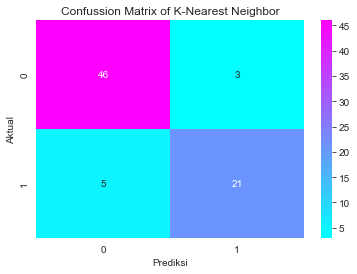

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, pr_pred)

ax = sns.heatmap(cm, annot=True, cmap="cool")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of K-Nearest Neighbor')
plt.show()

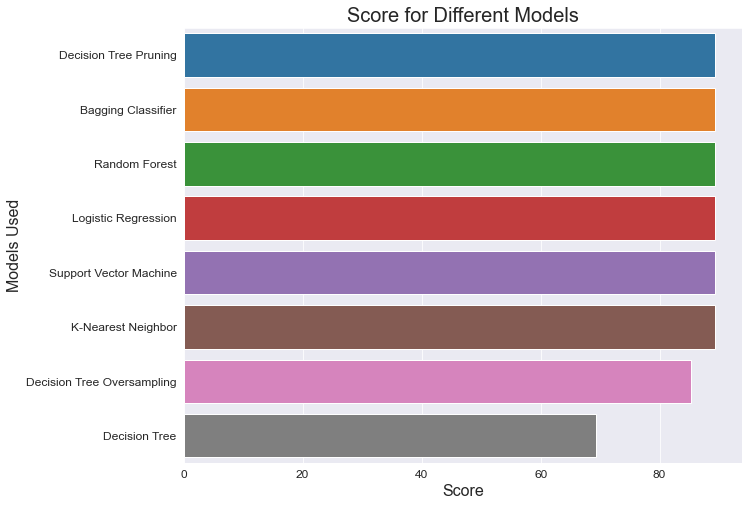

In [64]:
data = {'Decision Tree': acc_dtc * 100, 
        'Decision Tree Pruning': acc_prdtc * 100, 
        'Bagging Classifier': acc_bcl * 100, 
        'Random Forest': acc_rf * 100, 
        'Decision Tree Oversampling': acc_dtcovs * 100, 
        'Logistic Regression': acc_lr * 100,
        'Support Vector Machine': acc_svm * 100, 
        'K-Nearest Neighbor': acc_knn * 100}
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
score = list(data.values())
fig = plt.figure(figsize = (10, 8))
sns.barplot(x = score, y = models)
plt.xlabel("Score", size = 16)
plt.xticks(size = 12)
plt.ylabel("Models Used", size = 16)
plt.yticks(size = 12)
plt.title("Score for Different Models", size = 20)
plt.show()